In [ ]:
import numpy as np
import cv2
import PIL.Image as Image
import os 
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [ ]:
IMAGE_SHAPE = (224,224)

classifier = tf.keras.Sequential([
        hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape=IMAGE_SHAPE+(3,))
                                  
])

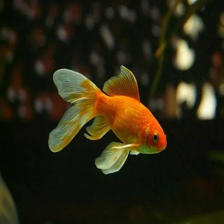

In [ ]:
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [ ]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [ ]:
gold_fish

array([[[0.08235294, 0.12941176, 0.04313725],
        [0.08235294, 0.12941176, 0.04313725],
        [0.06666667, 0.11764706, 0.02745098],
        ...,
        [0.04705882, 0.05882353, 0.03137255],
        [0.04313725, 0.05490196, 0.03529412],
        [0.04313725, 0.05490196, 0.03529412]],

       [[0.09411765, 0.12941176, 0.04705882],
        [0.09411765, 0.12941176, 0.04705882],
        [0.07843137, 0.11372549, 0.03137255],
        ...,
        [0.04705882, 0.05882353, 0.03137255],
        [0.04313725, 0.05490196, 0.03529412],
        [0.04313725, 0.05490196, 0.03529412]],

       [[0.10588235, 0.1254902 , 0.04705882],
        [0.10588235, 0.1254902 , 0.04705882],
        [0.09019608, 0.10980392, 0.03529412],
        ...,
        [0.04705882, 0.05882353, 0.03137255],
        [0.04313725, 0.05490196, 0.03529412],
        [0.04313725, 0.05490196, 0.03529412]],

       ...,

       [[0.18039216, 0.21568627, 0.10588235],
        [0.18823529, 0.22352941, 0.11372549],
        [0.18823529, 0

In [ ]:
gold_fish[np.newaxis,...].shape

(1, 224, 224, 3)

In [ ]:
result = classifier.predict(gold_fish[np.newaxis,...])

In [ ]:
predicted_label_index =np.argmax(result)

In [ ]:
predicted_label_index

2

In [ ]:
url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir= tf.keras.utils.get_file("flower_photos",origin=url,cache_dir='',untar=True)

228827136/228813984 [==============================] - 1s 0us/step


In [ ]:
data_dir

'/tmp/.keras/datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/tmp/.keras/datasets/flower_photos')

In [ ]:
# making the dictionary of flowers
flowers_images_dict = {
    'roses':list(data_dir.glob('roses/*')),
    "daisy":list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*'))
}

In [ ]:
flowers_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [ ]:
X ,y =[] ,[]

for flower_names,images in flowers_images_dict.items():
  for image in images:
    img= cv2.imread(str(image))
    resized_img = cv2.resize(img,IMAGE_SHAPE)
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_names])

In [ ]:
X = np.array(X)/255
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model,input_shape=(224,224,3),trainable=False #it means u cannot train the hidden layers
)

In [ ]:
num_of_flowers = 5
model = tf.keras.Sequential([
        pretrained_model_without_top_layer,
        tf.keras.layers.Dense(num_of_flowers)

])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
86/86 [==============================] - 69s 758ms/step - loss: 0.7958 - accuracy: 0.7093
Epoch 2/5
86/86 [==============================] - 65s 757ms/step - loss: 0.4052 - accuracy: 0.8608
Epoch 3/5
86/86 [==============================] - 65s 755ms/step - loss: 0.3132 - accuracy: 0.8957
Epoch 4/5
86/86 [==============================] - 66s 764ms/step - loss: 0.2588 - accuracy: 0.9128
Epoch 5/5
86/86 [==============================] - 65s 755ms/step - loss: 0.2204 - accuracy: 0.9320
